In [ ]:
!pip install ultralytics

In [ ]:
import pandas as pd
from ultralytics import YOLO
import os
from IPython.display import Image, display
import shutil
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2

train_img_dir = '/kaggle/input/visdrone2019-det/VisDrone/images/train'
val_img_dir = '/kaggle/input/visdrone2019-det/VisDrone/images/val'

data_yaml_content = """
# YOLOv8 Dataset Configuration
train: /kaggle/input/visdrone2019-det/VisDrone/images/train
val: /kaggle/input/visdrone2019-det/VisDrone/images/val
nc: 10
names: ['pedestrian', 'people', 'bicycle', 'car', 'van', 'truck', 'tricycle', 'awning-tricycle', 'bus', 'motor']
"""

data_yaml_path = '/kaggle/working/data.yaml'
with open(data_yaml_path, 'w') as f:
    f.write(data_yaml_content)

print(f"Dataset YAML created at {data_yaml_path}")

model = YOLO('yolov8l.pt')

model.train(
    data=data_yaml_path,
    epochs=50,
    batch=16,
    imgsz=640,
    workers=8,
    device='0,1'
)

model.export(format='onnx')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 15.4 MB/s eta 0:00:00a 0:00:01
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Dataset YAML created at /kaggle/working/data.yaml


100%|██████████| 83.7M/83.7M [00:00<00:00, 269MB/s]


Ultralytics 8.3.49 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
                                                 CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/kaggle/working/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0,1, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf

100%|██████████| 755k/755k [00:00<00:00, 17.7MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 74.2MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/visdrone2019-det/VisDrone/labels/train... 6471 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6471/6471 [00:56<00:00, 115.27it/s]


train: WARNING ⚠️ /kaggle/input/visdrone2019-det/VisDrone/images/train/0000137_02220_d_0000163.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/input/visdrone2019-det/VisDrone/images/train/0000140_00118_d_0000002.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/input/visdrone2019-det/VisDrone/images/train/9999945_00000_d_0000114.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/input/visdrone2019-det/VisDrone/images/train/9999987_00000_d_0000049.jpg: 1 duplicate labels removed
train: WARNING ⚠️ Cache directory /kaggle/input/visdrone2019-det/VisDrone/labels is not writeable, cache not saved.


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.21). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
train: Scanning /kaggle/input/visdrone2019-det/VisDrone/labels/train... 52 images, 0 backgrounds, 0 corrupt:   1%|          | 52/6471 [00:00<00:12, 503.77it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/visdrone2019-det/VisDrone/labels/val... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:03<00:00, 162.43it/s]28it/s]
train: Scanning /kaggle/input/visdrone2019-det/VisDrone/labels/train... 3291 images, 0 backgrounds, 0 corrupt:  51%|█████     | 3291/6471 [00:05<00:05, 601.50it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/visdrone2019-det/VisDrone/labels is not writeable, cache not saved.


train: Scanning /kaggle/input/visdrone2019-det/VisDrone/labels/train... 4177 images, 0 backgrounds, 0 corrupt:  65%|██████▍   | 4177/6471 [00:06<00:04, 538.79it/s]

Plotting labels to runs/detect/train/labels.jpg... 


train: Scanning /kaggle/input/visdrone2019-det/VisDrone/labels/train... 6471 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6471/6471 [00:12<00:00, 512.67it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.21). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.27G      1.389       1.33     0.9649        531        640: 100%|██████████| 405/405 [03:40<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.44it/s]


                   all        548      38759      0.384      0.288      0.284      0.167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       7.8G      1.395       1.12     0.9631        368        640: 100%|██████████| 405/405 [03:36<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.69it/s]


                   all        548      38759      0.389      0.295      0.285      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.12G      1.403      1.108     0.9626        537        640: 100%|██████████| 405/405 [03:32<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.92it/s]


                   all        548      38759      0.377      0.305      0.289      0.169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.04G      1.363      1.058     0.9551        451        640: 100%|██████████| 405/405 [03:33<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.91it/s]


                   all        548      38759      0.431      0.329      0.332      0.193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       8.1G      1.331      1.011     0.9455        199        640: 100%|██████████| 405/405 [03:32<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.93it/s]


                   all        548      38759       0.46      0.336      0.344      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.58G      1.326     0.9982     0.9455        206        640: 100%|██████████| 405/405 [03:32<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.90it/s]


                   all        548      38759      0.458      0.352      0.361      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.42G       1.29     0.9576     0.9327        445        640: 100%|██████████| 405/405 [03:32<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.93it/s]


                   all        548      38759      0.476      0.353      0.364      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       8.6G      1.284     0.9482     0.9306        227        640: 100%|██████████| 405/405 [03:32<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.95it/s]


                   all        548      38759      0.483      0.352      0.363      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.78G      1.275     0.9259     0.9258        288        640: 100%|██████████| 405/405 [03:33<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.97it/s]


                   all        548      38759      0.482      0.362      0.376      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.53G      1.267     0.9137     0.9272        345        640: 100%|██████████| 405/405 [03:33<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.91it/s]


                   all        548      38759       0.49      0.376      0.386      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      8.06G      1.267     0.9102     0.9258        294        640: 100%|██████████| 405/405 [03:32<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.97it/s]


                   all        548      38759      0.491      0.375      0.383      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.28G      1.246     0.8856     0.9207        223        640: 100%|██████████| 405/405 [03:32<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.88it/s]


                   all        548      38759      0.491       0.39      0.398      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.67G      1.244     0.8691     0.9148        270        640: 100%|██████████| 405/405 [03:32<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.94it/s]


                   all        548      38759      0.505      0.386      0.399       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.87G      1.219     0.8629     0.9146        331        640: 100%|██████████| 405/405 [03:32<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.92it/s]


                   all        548      38759      0.501      0.384      0.396      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.96G      1.228      0.856     0.9115        345        640: 100%|██████████| 405/405 [03:32<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.90it/s]


                   all        548      38759      0.521      0.382      0.409      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.72G      1.224     0.8509     0.9112        195        640: 100%|██████████| 405/405 [03:32<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.92it/s]


                   all        548      38759      0.522      0.398      0.416      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.15G      1.216     0.8442     0.9083        436        640: 100%|██████████| 405/405 [03:33<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.93it/s]


                   all        548      38759      0.506      0.411      0.416      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.09G      1.206     0.8288     0.9111        486        640: 100%|██████████| 405/405 [03:33<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.94it/s]


                   all        548      38759      0.519      0.406      0.415      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      10.1G      1.204     0.8186     0.9056        308        640: 100%|██████████| 405/405 [03:32<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.94it/s]


                   all        548      38759      0.517      0.394      0.416      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       7.8G      1.196     0.8089     0.9047        203        640: 100%|██████████| 405/405 [03:32<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.95it/s]


                   all        548      38759      0.537        0.4      0.422      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.24G      1.168     0.7905     0.8999        126        640: 100%|██████████| 405/405 [03:32<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.92it/s]


                   all        548      38759      0.543      0.402      0.428      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.59G      1.198     0.8046     0.9024        466        640: 100%|██████████| 405/405 [03:32<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.97it/s]


                   all        548      38759      0.534      0.412      0.429      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       7.4G      1.176     0.7858     0.8957        386        640: 100%|██████████| 405/405 [03:32<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.98it/s]


                   all        548      38759      0.531       0.42      0.437      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.31G      1.178     0.7876     0.8999        307        640: 100%|██████████| 405/405 [03:32<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.97it/s]


                   all        548      38759      0.545      0.415      0.435      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.72G      1.159     0.7676        0.9        151        640: 100%|██████████| 405/405 [03:32<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.97it/s]


                   all        548      38759      0.541       0.41      0.435      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.62G      1.157     0.7593     0.8948        406        640: 100%|██████████| 405/405 [03:32<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.96it/s]


                   all        548      38759      0.543      0.417      0.437      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.59G      1.159     0.7621     0.8948        440        640: 100%|██████████| 405/405 [03:32<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.95it/s]


                   all        548      38759       0.54      0.425      0.443      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.82G      1.152     0.7565     0.8945        111        640: 100%|██████████| 405/405 [03:33<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.96it/s]


                   all        548      38759      0.545      0.425      0.444      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.38G      1.139     0.7447     0.8877        594        640: 100%|██████████| 405/405 [03:32<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.95it/s]


                   all        548      38759      0.545      0.427      0.446      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.12G      1.152     0.7433     0.8931        320        640: 100%|██████████| 405/405 [03:32<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.98it/s]


                   all        548      38759      0.549      0.426      0.447      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      9.24G      1.141     0.7301     0.8916        153        640: 100%|██████████| 405/405 [03:32<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.88it/s]


                   all        548      38759      0.551      0.422      0.444      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       7.8G       1.13     0.7213     0.8871        422        640: 100%|██████████| 405/405 [03:32<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.95it/s]


                   all        548      38759      0.558      0.424      0.451      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.48G      1.123     0.7195     0.8885        501        640: 100%|██████████| 405/405 [03:32<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.95it/s]


                   all        548      38759      0.553      0.425      0.449      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.69G      1.114     0.7058      0.883        328        640: 100%|██████████| 405/405 [03:32<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.95it/s]


                   all        548      38759      0.567      0.426      0.451      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.61G      1.119     0.7117     0.8848        315        640: 100%|██████████| 405/405 [03:31<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.95it/s]


                   all        548      38759       0.56      0.434      0.456      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      9.19G      1.115     0.7052      0.884        282        640: 100%|██████████| 405/405 [03:32<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.99it/s]


                   all        548      38759      0.561      0.436      0.454       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.94G      1.105      0.692     0.8828        539        640: 100%|██████████| 405/405 [03:32<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.98it/s]


                   all        548      38759      0.564      0.426      0.453      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      7.93G      1.103     0.6873     0.8791        392        640: 100%|██████████| 405/405 [03:32<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.99it/s]


                   all        548      38759      0.564      0.434      0.457      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.51G      1.109     0.6866     0.8813        252        640: 100%|██████████| 405/405 [03:32<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.00it/s]


                   all        548      38759      0.562      0.435      0.457      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       9.7G      1.086     0.6706      0.879        287        640: 100%|██████████| 405/405 [03:32<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.00it/s]


                   all        548      38759      0.564      0.441      0.461      0.286
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
  0%|          | 0/405 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.12G      1.085     0.6531     0.8785        206        640: 100%|██████████| 405/405 [03:28<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.98it/s]


                   all        548      38759      0.556      0.437      0.456      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.62G      1.071     0.6387     0.8759        223        640: 100%|██████████| 405/405 [03:27<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.97it/s]


                   all        548      38759       0.56      0.444      0.462      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.35G      1.076     0.6414     0.8771        189        640: 100%|██████████| 405/405 [03:28<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.97it/s]


                   all        548      38759      0.548      0.442      0.458      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       8.3G      1.068      0.628     0.8756        313        640: 100%|██████████| 405/405 [03:28<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.99it/s]


                   all        548      38759      0.557      0.438      0.458      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      8.72G      1.051     0.6179     0.8744        202        640: 100%|██████████| 405/405 [03:28<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.00it/s]


                   all        548      38759      0.553      0.446      0.459      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.07G      1.054     0.6185     0.8753        125        640: 100%|██████████| 405/405 [03:28<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.96it/s]


                   all        548      38759      0.561      0.446       0.46      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.53G      1.044     0.6035     0.8702        310        640: 100%|██████████| 405/405 [03:27<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.93it/s]


                   all        548      38759      0.569      0.443      0.461      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.04G      1.039     0.6003     0.8711        217        640: 100%|██████████| 405/405 [03:27<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.01it/s]


                   all        548      38759      0.565      0.445       0.46      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.38G      1.038     0.5966     0.8706        352        640: 100%|██████████| 405/405 [03:27<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.01it/s]


                   all        548      38759      0.558       0.45      0.462      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.29G      1.038     0.5913     0.8704        235        640: 100%|██████████| 405/405 [03:28<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.92it/s]


                   all        548      38759      0.555       0.45       0.46      0.284

50 epochs completed in 3.098 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 87.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 87.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
                                                 CUDA:1 (Tesla T4, 15095MiB)
Model summary (fused): 268 layers, 43,614,318 parameters, 0 gradients, 164.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:13<00:00,  2.53it/s]


                   all        548      38759      0.565       0.44      0.461      0.286
            pedestrian        520       8844      0.608      0.447      0.498      0.242
                people        482       5125      0.661      0.305      0.389      0.163
               bicycle        364       1287      0.306      0.219      0.192     0.0909
                   car        515      14064      0.773      0.791      0.825      0.603
                   van        421       1975      0.513      0.513        0.5      0.359
                 truck        266        750      0.557      0.454       0.46      0.316
              tricycle        337       1045      0.494      0.387      0.376      0.218
       awning-tricycle        220        532      0.379      0.218      0.205       0.13
                   bus        131        251      0.782      0.554      0.654      0.488
                 motor        485       4886      0.572      0.511      0.515      0.247
Speed: 0.1ms preproce

'runs/detect/train/weights/best.onnx'

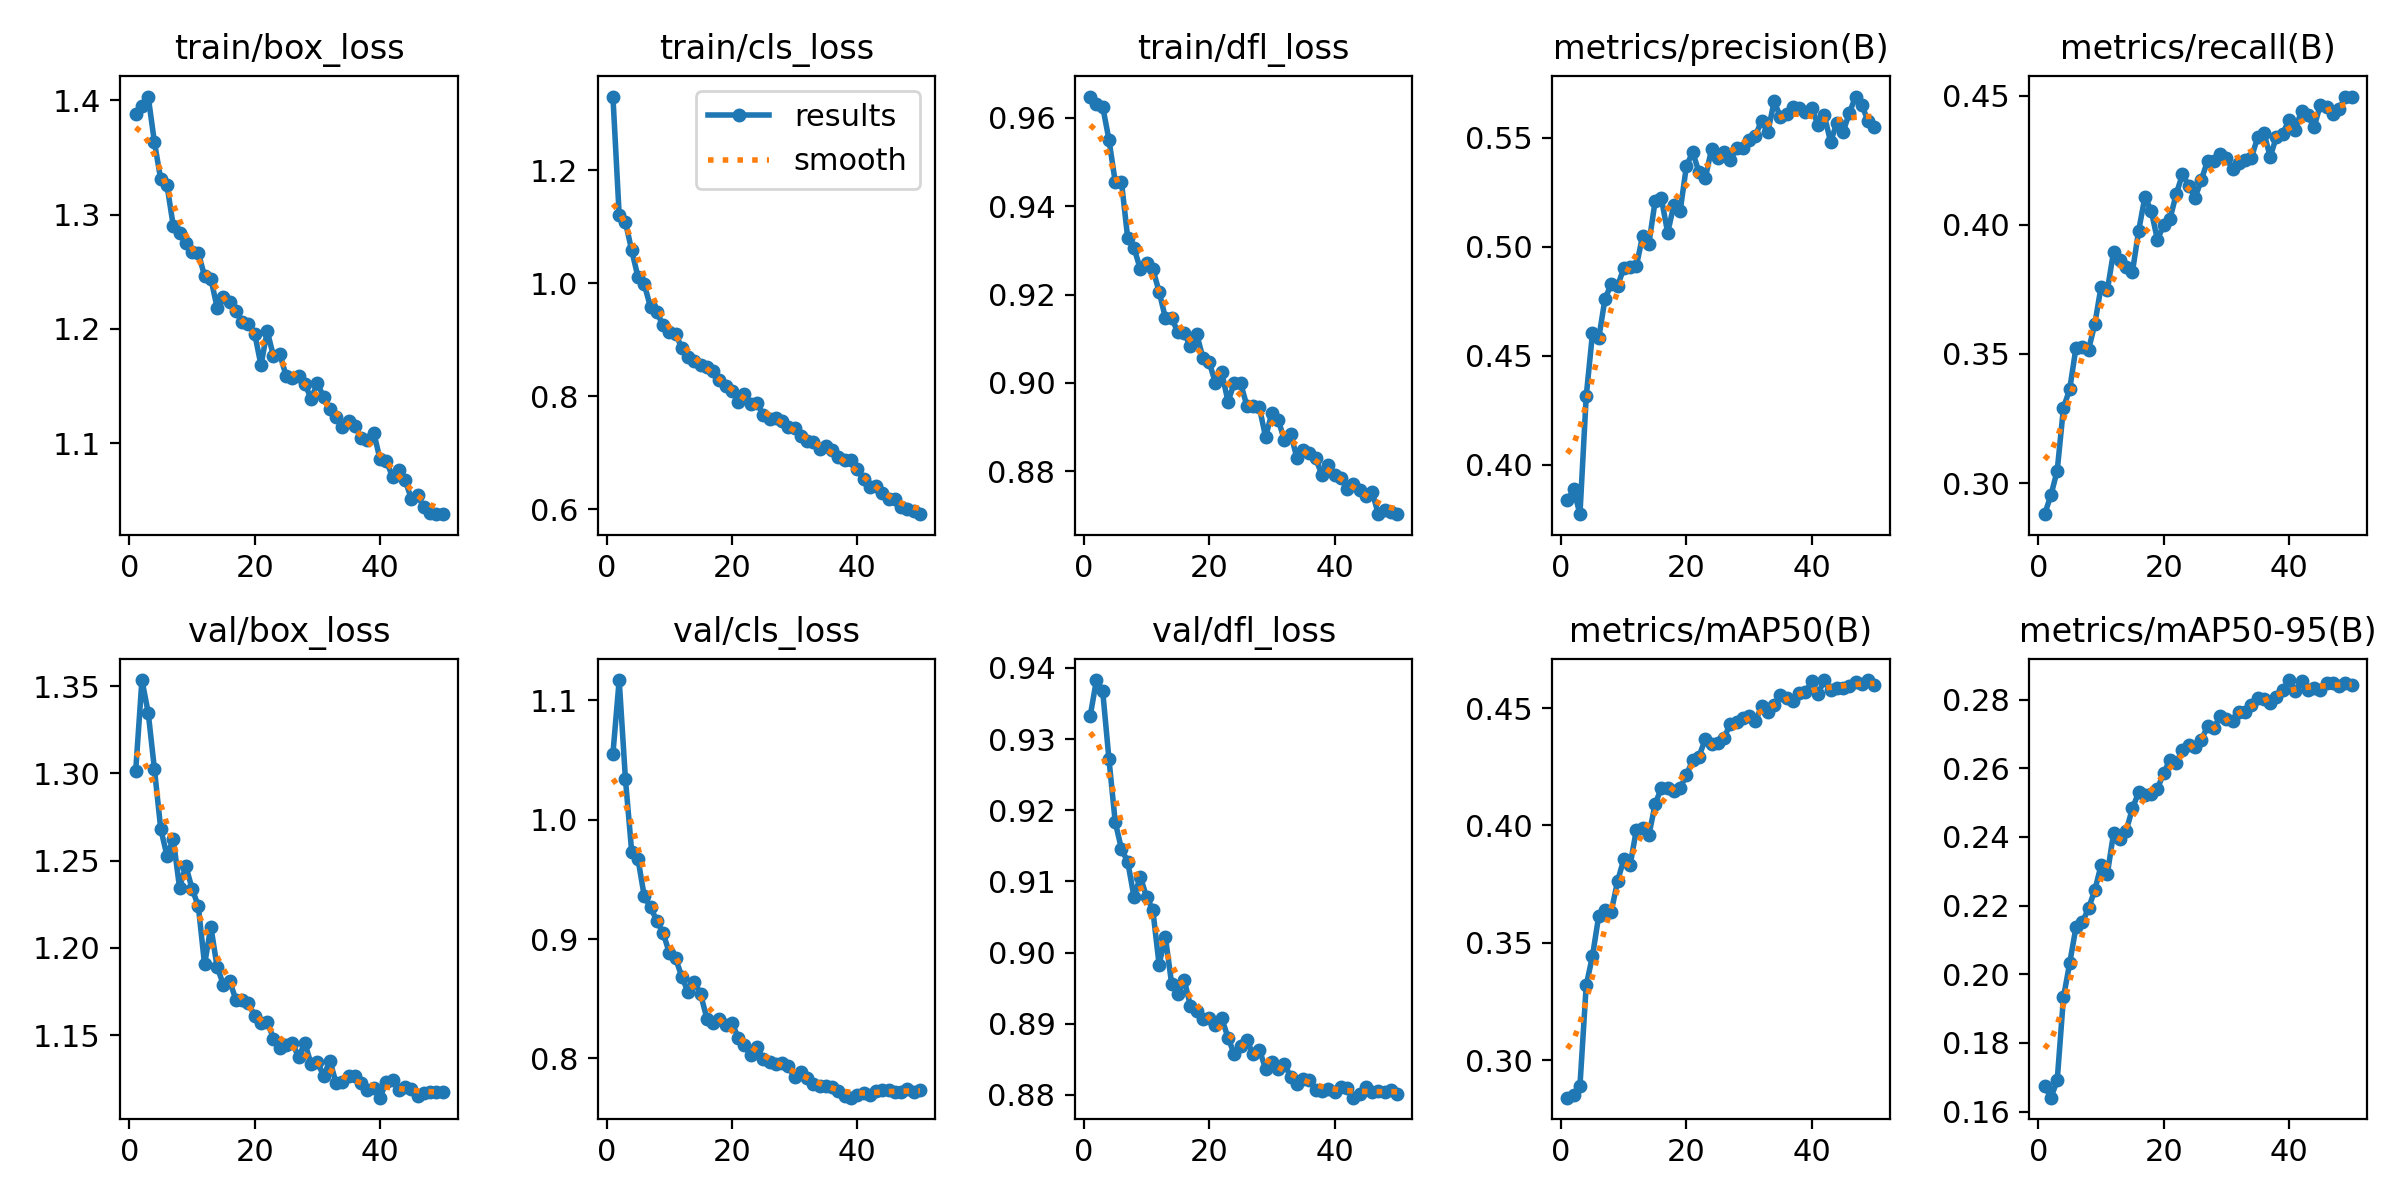

In [ ]:
# Displaying training metrics
train_results = 'runs/detect/train/results.png'
if os.path.exists(train_results):
    display(Image(filename=train_results))
else:
    print("Training results image not found!")

In [ ]:
# Creating a temporary test folder
source_folder = '/kaggle/input/visdrone2019-det/VisDrone/images/val'
test_folder = '/kaggle/working/VisDrone/images/test'

os.makedirs(test_folder, exist_ok=True)

# Splitting some files from validation sets (I could've do from training set but to increase transparency I took data from val set)
files = os.listdir(source_folder)
test_files, _ = train_test_split(files, test_size=0.8, random_state=42)

for file in test_files:
    shutil.copy(os.path.join(source_folder, file), os.path.join(test_folder, file))

In [ ]:
dataset_yaml = """
path: /kaggle/working/VisDrone
train: images/train
val: images/val
test: images/test

names:
  0: pedestrian
  1: people
  2: bicycle
  3: car
  4: van
  5: truck
  6: tricycle
  7: awning-tricycle
  8: bus
  9: motor
"""

with open('/kaggle/working/visdrone.yaml', 'w') as file:
    file.write(dataset_yaml)

print("YAML file created successfully at: /kaggle/working/visdrone.yaml")

YAML file created successfully at: /kaggle/working/visdrone.yaml


In [ ]:
# Loading the trained model with the correct path to the weights
weights_path = "/kaggle/working/runs/detect/train/weights/best.pt"
model = YOLO(weights_path)

test_images_path = "/kaggle/working/VisDrone/images/test"

results = model.predict(source=test_images_path, save=True, device=0)

print("Inference completed. Results saved to:", results[0].save_dir)


image 1/109 /kaggle/working/VisDrone/images/test/0000001_02999_d_0000005.jpg: 384x640 2 pedestrians, 5 peoples, 15 cars, 3 trucks, 53 motors, 62.9ms
image 2/109 /kaggle/working/VisDrone/images/test/0000001_03999_d_0000007.jpg: 384x640 11 pedestrians, 4 peoples, 5 cars, 1 tricycle, 2 awning-tricycles, 23 motors, 37.4ms
image 3/109 /kaggle/working/VisDrone/images/test/0000021_00800_d_0000003.jpg: 384x640 4 pedestrians, 3 peoples, 1 tricycle, 37.4ms
image 4/109 /kaggle/working/VisDrone/images/test/0000022_01251_d_0000007.jpg: 384x640 4 pedestrians, 6 peoples, 3 bicycles, 37.3ms
image 5/109 /kaggle/working/VisDrone/images/test/0000026_00500_d_0000025.jpg: 384x640 4 pedestrians, 1 bicycle, 10 cars, 1 van, 37.3ms
image 6/109 /kaggle/working/VisDrone/images/test/0000026_01000_d_0000026.jpg: 384x640 2 pedestrians, 2 bicycles, 15 cars, 4 vans, 1 truck, 3 motors, 37.3ms
image 7/109 /kaggle/working/VisDrone/images/test/0000026_03000_d_0000030.jpg: 384x640 11 cars, 1 van, 2 trucks, 31.6ms
image 8

In [ ]:
inference_dir = results[0].save_dir

for img_name in os.listdir(inference_dir):
    if img_name.endswith(".jpg"):
        img_path = os.path.join(inference_dir, img_name)

        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.axis('off')  # Hide axes
        plt.show()

## IMPORTANT: This is where the detection images were in output. With those images the file was close to 38 MB but Git would only accept up to 25 MB hence I was forced to clear this cell's output. To see the result of my work i.e, detection on the dataset of drone image, I highly recommend enthusiasts to run the project themselves. Excuse me for the inconvenience. 💜 ##

In [ ]:
results = model.val(source=test_images_path)
print("Validation results:", results)

Ultralytics 8.3.49 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /kaggle/input/visdrone2019-det/VisDrone/labels/val... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:01<00:00, 412.99it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/visdrone2019-det/VisDrone/labels is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:21<00:00,  1.60it/s]


                   all        548      38759      0.564      0.441      0.462      0.287
            pedestrian        520       8844      0.609       0.45        0.5      0.245
                people        482       5125      0.664      0.308      0.393      0.165
               bicycle        364       1287      0.308      0.222      0.193     0.0905
                   car        515      14064      0.772      0.791      0.825      0.605
                   van        421       1975      0.512      0.513        0.5      0.361
                 truck        266        750      0.552      0.452      0.459      0.317
              tricycle        337       1045      0.492      0.389      0.375      0.218
       awning-tricycle        220        532      0.378      0.218      0.204       0.13
                   bus        131        251      0.781      0.554      0.655      0.489
                 motor        485       4886      0.572      0.513      0.517      0.248
Speed: 0.4ms preproce

In [ ]:
# Extracting the results dictionary
metrics_dict = results.results_dict

metrics_df = pd.DataFrame(list(metrics_dict.items()), columns=['Metric', 'Value'])

print(metrics_df)

                 Metric     Value
0  metrics/precision(B)  0.564037
1     metrics/recall(B)  0.441015
2      metrics/mAP50(B)  0.462301
3   metrics/mAP50-95(B)  0.286784
4               fitness  0.304336
